# Latar Belakang 
Sebuah perusahaan di bidang broadcasting dan multimedia ingin membuat lini bisnis baru demi menambah keuntungan perusahaan, salah peluang yang saat ini sedang berkembang adalah dunia digital, mengingat semua orang sudah dapat mengakses internet dari mana saja. Melihat peluang ini perusahaan memutuskan untuk masuk ke dunia Youtube guna menambah keuntungan perushaan, seperti yang kita ketahui bahwa video dengan view atau penonton yang tinggi dapat menghasilkan value, baik berupa adsense ataupun engagement rate yang dapat menarik brand maupun konten kreator lain untuk melakukan kerja sama. 

# Goals
**Membuat standar atau acuan bagi perusahaan dalam membuat video atau konten dengan efektif dan efisien.**

# Pernyataan Masalah 
Berbekal data-data yang di scraping dari youtube API, perusahaan ingin mengetahui apa saja yang harus dilakukan oleh agar dapat membuat konten-konten yang banyak diminati oleh penonton atau viewers. Karena dengan adanya analisis yang mendalam terkait konten, perusahaan tidak perlu meraba-raba dalam membuat konten yang dapat menimbulkan cost atau beban perusaahaan. Perusahaan meminta seorang data scientist untuk melakukan analisis yang mendalam terkait gambaran atau karakteristik video yang masuk dalam trending list pada data tersebut. 

**Pertanyaan penelitian : Bagaimana karakteristik video Youtube yang masuk pada list trending di negara US?**

# Data 
Data yang digunakan dalam analisis ini hanya data list trending US selama 205 Hari, yang mana tidak dapat dibandingkan dengan data video yang tidak trending.
Untuk menjawab pertanyaan perusahaan, kita akan menganalisi data history trending youtube yang sudah di scraing dari youtube API. Data yang digunakan ada dua yaitu berformat csv dan json. Untuk data dapat di akses di http: https://www.kaggle.com/datasets/datasnaek/youtube-new

# Landasan Analisis
Trending merupakan fitur yang dibuat oleh youtube untuk menampilkan video yang sedang populer di youtube dan di seluruh dunia. Trending juga bertujuan untuk menampilkan video yang menarik dan banyak penonton. Beberapa tren dapat diprediksi, misalnya lagu baru dari artis populer atau cuplikan film baru. Namun, beberapa di antaranya tidak bisa diduga, misalnya saja video yang tiba-tiba viral.

Apa yang menentukan pemberian peringkat video di Trending?
Di antara banyak video baru yang bagus di YouTube pada hari tertentu, hanya sejumlah video tertentu saja yang bisa muncul di Trending. Tujuan tab Trending adalah menampilkan video yang:

* Dianggap menarik oleh cakupan penonton yang luas
* Tidak menyesatkan, bersifat clickbait, atau sensasional
* Memperlihatkan keragaman peristiwa yang sedang terjadi di YouTube dan di seluruh dunia
* Menampilkan keragaman kreator
* Idealnya, video yang mengejutkan atau benar-benar baru

Tab Trending bertujuan untuk menyeimbangkan semua pertimbangan ini. Untuk mencapai keseimbangan tersebut, Trending mempertimbangkan berbagai sinyal, termasuk (namun tidak terbatas pada):

* Jumlah penayangan
* Seberapa cepat video menghasilkan penayangan (dengan kata lain, “temperatur”)
* Sumber asal penayangan, termasuk dari luar YouTube
* Umur video
* Performa video dibandingkan dengan upload terbaru lainnya dari channel yang sama

Di sebagian besar pasar utama, kami memastikan bahwa setidaknya separuh video yang ditampilkan di tab Trending berasal dari kreator yang memang mengutamakan membuat konten di YouTube.
sumber : https://support.google.com/youtube/answer/7239739?hl=id


# Data Pre Processing 

In [1]:
# import library 
import numpy as np
import pandas as pd
import json
import datetime
import isodate
from dateutil import parser
from datetime import datetime
from googleapiclient.discovery import build
from wordcloud import WordCloud, STOPWORDS

# import library untuk visualisasi 
import matplotlib.pyplot as plt
import seaborn as sns 

from scipy.stats import normaltest

import warnings
warnings.filterwarnings("ignore")

In [2]:
# load data set dan tampilkan dataset 
df = pd.read_csv("USvideos.csv")
df.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...


# Dataset Information
Dataset ini berisi informasi tentang trending youtube di US yang berisi 16 kolom, berikut masing-masing keterangan dari kolom yang ada dalam dataset:
1. `video_id` : ID video yang dimiliki oleh masing-masing video
2. `trending_date` : Tanggal kapan video tersebut masuk list trending
3. `title : Judul` Video
4. `channel_title` : Nama Channel Youtube
5. `category_id` : Nomor Kategori ID
6. `publish_time` : Waktu Upload Video
7. `tags` : Tags atau keyword yang terdapat dalam video
8. `views` : Jumlah views pada saat masuk list trending (hari trending)
9. `likes` : Jumlah likes pada saat masuk list trending (hari trending)
10. `dislikes` : Jumlah dislikes pada saat trending (hari trending)
11. `comment_count` : Jumlah komentar pada video saat trending (hari trending)
12. `thumbnail_link` : Link gambar thumbnail video
13. `comments_disabled` : Pengaturan komentar video (Komentar dimatikan/tidak)
14. `rating disabled` : Pengaturan like dan dislikes video (dimatikan/tidak)
15. `video_error_or_removed`	: Video yang error atau telah dihapus
16. `description` : Deskripsi pada video

In [3]:
# membuka file JSON
f = open('US_category_id.json')
f = json.load(f)

# mengambil data dari file json
data_json = []
for i in f["items"]:
    data = {"category_id": i["id"],
           "category" : i["snippet"]["title"]}
    data_json.append(data)
df2 = pd.DataFrame(data_json)
df2.head()

,category_id,category
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports


In [4]:
# penambahan kolom kategory pada data frame yang di ambil dari data json
# menggunakan merge 
df2 ["category_id"] = df2["category_id"].apply(lambda x: int(x))
df_trend = pd.merge(df, df2, on="category_id")
df_trend.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1,0mlNzVSJrT0,17.14.11,Me-O Cats Commercial,Nobrand,22,2017-04-21T06:47:32.000Z,"cute|""cats""|""thai""|""eggs""",98966,2486,184,532,https://i.ytimg.com/vi/0mlNzVSJrT0/default.jpg,False,False,False,Kittens come out of the eggs in a Thai commerc...,People & Blogs
2,STI2fI7sKMo,17.14.11,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,22,2017-11-11T15:00:03.000Z,"shawn johnson|""andrew east""|""shawn east""|""shaw...",321053,4451,1772,895,https://i.ytimg.com/vi/STI2fI7sKMo/default.jpg,False,False,False,Subscribe for weekly videos ▶ http://bit.ly/sj...,People & Blogs
3,KODzih-pYlU,17.14.11,BLIND(folded) CAKE DECORATING CONTEST (with Mo...,Grace Helbig,22,2017-11-11T18:08:04.000Z,"itsgrace|""funny""|""comedy""|""vlog""|""grace""|""helb...",197062,7250,217,456,https://i.ytimg.com/vi/KODzih-pYlU/default.jpg,False,False,False,Molly is an god damn amazing human and she cha...,People & Blogs
4,8mhTWqWlQzU,17.14.11,Wearing Online Dollar Store Makeup For A Week,Safiya Nygaard,22,2017-11-11T01:19:33.000Z,wearing online dollar store makeup for a week|...,2744430,115426,1110,6541,https://i.ytimg.com/vi/8mhTWqWlQzU/default.jpg,False,False,False,I found this online dollar store called ShopMi...,People & Blogs


# Data Understanding and Data Cleaning

In [5]:
# Menampilkan informasi dataset
print("Jumlah baris dan kolom pada dataset yang telah dimerge adalah", df_trend.shape)
df_trend.info()

Jumlah baris dan kolom pada dataset yang telah dimerge adalah (40949, 17)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 40949 entries, 0 to 40948
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 no

In [6]:
# menampilkan informasi dataset
display(df_trend.describe(), df_trend.describe(include='object'))

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


,video_id,trending_date,title,channel_title,publish_time,tags,thumbnail_link,description,category
count,40949,40949,40949,40949,40949,40949,40949,40379,40949
unique,6351,205,6455,2207,6269,6055,6352,6901,16
top,j4KvrAUjn6c,17.14.11,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,ESPN,2018-05-18T14:00:04.000Z,[none],https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg,► Listen LIVE: http://power1051fm.com/\n► Face...,Entertainment
freq,30,200,30,203,50,1535,30,58,9964


Dari data di atas kita dapat melihat bahwa terdapat `205` unique trening_dates, yang mana itu berasal dari 205 hari trending video selama 205 hari. 

Dari kolom deskripsi dapat dilihat bahwa terdapat 40379 video, dengan kata lain sebanyak 570 (40949-40379) tidak memiliki deskripsi video. Channel `ESPN` memiliki frekuensi trending paling tinggi dengan 203 kali masuk list trending. Video dengan category `Enterntainment` memiliki jumlah video yang paling banyak masuk list trending dibanding video lain. Video dengan judul `WE MADE OUR MOM CRY...HER DREAM CAME TRUE!` memiliki frekuensi trending paling banyak dibanding video lain dengan 30 kali masuk list trending.

Untuk melihat fenomena di atas kita akan meelakukan analisis lebih dalam pada langkah Data Analsis.

In [7]:
# menampilkan nama kolom, jumlah data unik, dan data unik pada dataset
listItem = []
for col in df.columns :
    listItem.append( [col, df_trend[col].nunique(), df_trend[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,video_id,6351,"[2kyS6SvSYSE, 0mlNzVSJrT0, STI2fI7sKMo, KODzih..."
1,trending_date,205,"[17.14.11, 17.15.11, 17.16.11, 17.17.11, 17.18..."
2,title,6455,"[WE WANT TO TALK ABOUT OUR MARRIAGE, Me-O Cats..."
3,channel_title,2207,"[CaseyNeistat, Nobrand, Shawn Johnson East, Gr..."
4,category_id,16,"[22, 24, 23, 28, 1, 25, 17, 10, 15, 27, 26, 2,..."
5,publish_time,6269,"[2017-11-13T17:13:01.000Z, 2017-04-21T06:47:32..."
6,tags,6055,"[SHANtell martin, cute|""cats""|""thai""|""eggs"", s..."
7,views,40478,"[748374, 98966, 321053, 197062, 2744430, 17770..."
8,likes,29850,"[57527, 2486, 4451, 7250, 115426, 6271, 43875,..."
9,dislikes,8516,"[2966, 184, 1772, 217, 1110, 88, 1326, 2356, 3..."


Berdasarkan informasi di atas kita dapat melihat bahwa data set yang kita gunakan memiliki 40949 baris data dan 17 kolom, dengan 3 tipe bolean, 5 integer, dan 9 object atau string. Dapat dilihat juga bahwa hampir semua data tidak memiliki missing value kecuali data "description".
* Terdapat 6351 unique `video_id` yang artinya hanya terdapat 6351 video yang trending pada data tersebut.<br>
* 205 hari trending yang dapat dilihat dari kolom `trending_date`.
* Terdapat 6455 Judul Video pada dateset.
* Terdapat 6269 Channel Youtube/Konten Kreator pada dataset
* Kategori yang masuk pada list trending sebanyak 16 kategori dari 32 kategori yang ada.
* Terdapat 2207 yang masuk pada list trending.

## Missing Value

In [8]:
# pengecekan missing value
df_trend.isna().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
category                    0
dtype: int64

Pada dataset awal terdapat 570 missing value pada kolom deskripsi dan kita akan ini dengan value "no desctription video" karena asumsinya video tersebut memang diunggah tanpa menuliskan deskripsi video.

In [9]:
# mengisi mising value dengan string "no description video"
df_trend["description"].fillna("no description video", inplace=True)

In [10]:
# cek kembali missing value
df_trend.isna().sum() # sudah tidak terdapat missing value

video_id                  0
trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
category                  0
dtype: int64

In [11]:
# pada kolom tags terdapat 1535 data yang memiliki value string [none]
df_trend[df_trend["tags"] == "[none]"].count()

video_id                  1535
trending_date             1535
title                     1535
channel_title             1535
category_id               1535
publish_time              1535
tags                      1535
views                     1535
likes                     1535
dislikes                  1535
comment_count             1535
thumbnail_link            1535
comments_disabled         1535
ratings_disabled          1535
video_error_or_removed    1535
description               1535
category                  1535
dtype: int64

In [12]:
# mengisi mengganti [none] dengan nilai nan 
df_trend["tags"] = df_trend["tags"].apply(lambda x : np.nan if x == "[none]" else x)

Terdapat **1535** video yang memiliki tags "none" atau dapat kita asumsikan video yang diunggah memang tidak memiliki tags.

In [13]:
# cek duplikat value, jika ada akan kita drop 
# data duplikat merupakan data yang memiliki value sama pada setiap kolom
df_trend.duplicated().sum()

48

In [14]:
# drop duplicated value dan cek kembali
df_trend.drop_duplicates(inplace=True)

In [15]:
# cek kembali duplikat value
# duplikat pada dataset sudah tidak ada
df_trend.duplicated().sum()

0

In [16]:
# Menghitung jumlah tags pada setiap video 
# split masing-masing tag dengan string "|"
df_trend["tags"] = df_trend["tags"].str.split("|")

In [17]:
# Mengganti nilai nan dengan list kosong agar ketika di count nilainya 0
df_trend["tags"] = df_trend["tags"].fillna({i: [] for i in df_trend.index})

In [18]:
# convert tipe data object atau string ke datetime pada kolom trending date 
df_trend['trending_date']=pd.to_datetime(pd.Series(df_trend['trending_date'].apply(lambda x:'20'+x[0:2]+'.'+x[6:]+'.'+x[3:5])))
# convert tipe data object atau string ke datetime pada kolom publish time
df_trend['publish_time']=pd.to_datetime(pd.Series(df_trend['publish_time'].apply(lambda x:x[:19])))

In [19]:
# membuat kolom waktu jam, bulan, hari dan tahun publish video
df_trend["publish_time_hour"] = df_trend["publish_time"].dt.hour # jam 
df_trend["publish_time_month"] = df_trend["publish_time"].dt.month_name() # bulam
df_trend["publish_time_day"] = df_trend["publish_time"].dt.day_name() # hari
df_trend["publish_time_year"] = df_trend["publish_time"].dt.year # tahun

In [20]:
# menambah kolom trending_month
df_trend["trending_month"] = df_trend["trending_date"].dt.month_name()

In [21]:
# menambah kolom lama waktu trending dari video pertama di upload sampai waktunya trending
df_trend["trending_time"] = df_trend["trending_date"].dt.date - (df_trend["publish_time"].dt.date)

In [22]:
# menambah kolom durasi video dengan scraping data berdasarkan video_id menggunakan youtube API
api_key = '#############################' #isi dengan api_key sendiri
api_service_name = "youtube"
api_version = "v3"

youtube = build(
  api_service_name, api_version, developerKey=api_key)

In [23]:
# fungsi untuk scraping data 
def durasi (youtube, video_ids):
    df_durasi = []

    for i in range (0, len(video_ids), 50):
        request = youtube.videos().list(
            part="contentDetails",
            id=','.join(video_ids[i:i+50])
            )
        response = request.execute()
        for video in response['items']:
            stats_to_keep = {'contentDetails': ['duration']
                            }
            video_info = {}
            video_info ['video_id'] = video ['id']

            for k in stats_to_keep.keys():
                for v in stats_to_keep[k]:
                    try:
                        video_info[v] = video [k] [v]
                    except:
                        video_info[v] = None 
            df_durasi.append(video_info)

    return pd.DataFrame(df_durasi)

In [24]:
# mengambil list video_id dan dijadikan list 
listdurasi = df_trend["video_id"].tolist()
listdurasi

['2kyS6SvSYSE',
 '0mlNzVSJrT0',
 'STI2fI7sKMo',
 'KODzih-pYlU',
 '8mhTWqWlQzU',
 'pa_oUisZZy0',
 'fCTKDn3Q8xQ',
 '_dhneCO4YEE',
 'EYkEshCOhEU',
 'Eg_kW5fw6qU',
 '6Detw08jRhs',
 'P4YJwy_T9pM',
 '1640fZpYBSY',
 '7m630xvAJtA',
 '6ixU_vdE0Es',
 'wRGldR_SQAA',
 '6hTzM1BPdU8',
 '2kyS6SvSYSE',
 'ijJPFowBsBc',
 '0mlNzVSJrT0',
 'STI2fI7sKMo',
 '9KIP-Ncp2jU',
 'KODzih-pYlU',
 '8mhTWqWlQzU',
 'Fyyua5JzD9w',
 'pa_oUisZZy0',
 'fCTKDn3Q8xQ',
 'Eg_kW5fw6qU',
 '_dhneCO4YEE',
 'EYkEshCOhEU',
 '6Detw08jRhs',
 'cmoknv58jjE',
 '2kyS6SvSYSE',
 'Jidk0O6uu-0',
 'ijJPFowBsBc',
 '0mlNzVSJrT0',
 'STI2fI7sKMo',
 '9KIP-Ncp2jU',
 'KODzih-pYlU',
 '8mhTWqWlQzU',
 'pa_oUisZZy0',
 'Fyyua5JzD9w',
 't1shnJT8NCY',
 'l3xmc0pzzJI',
 'cmoknv58jjE',
 'mjBIsBPG1N8',
 'Jidk0O6uu-0',
 '2kyS6SvSYSE',
 'ijJPFowBsBc',
 '0mlNzVSJrT0',
 'STI2fI7sKMo',
 'KODzih-pYlU',
 'Qf1xyI_iKWA',
 'djlaHJCXT4o',
 't1shnJT8NCY',
 'By6Mi7VlqcU',
 'S_5TyDFx6kc',
 'l3xmc0pzzJI',
 'cmoknv58jjE',
 'mjBIsBPG1N8',
 'Gnxv9OH-giQ',
 'Jidk0O6uu-0',
 '2kyS6S

In [25]:
# mengambil data menggunakan fungsi durasi()
df_video_dur = durasi(youtube, listdurasi)
df_video_dur

,video_id,duration
0,2kyS6SvSYSE,PT11M18S
1,0mlNzVSJrT0,PT47S
2,STI2fI7sKMo,PT15M51S
3,KODzih-pYlU,PT7M44S
4,8mhTWqWlQzU,PT16M7S
...,...,...
37731,V6ElE2xs48c,PT6M29S
37732,V6ElE2xs48c,PT6M29S
37733,V6ElE2xs48c,PT6M29S
37734,V6ElE2xs48c,PT6M29S


In [26]:
# mengubah durasi video menjadi detik
df_video_dur['durationSecs'] = df_video_dur['duration'].apply(lambda x: isodate.parse_duration(x))
df_video_dur['durationSecs'] = df_video_dur['durationSecs'].astype('timedelta64[s]')
df_video_dur["durationSecs"].astype(int)

0        678
1         47
2        951
3        464
4        967
        ... 
37731    389
37732    389
37733    389
37734    389
37735    389
Name: durationSecs, Length: 37736, dtype: int64

In [27]:
# menambahkan kolom durasi dalam detik ke dataset
df_trend.set_index("video_id", inplace=True)
df_trend["duration"] = np.nan
for i in range (len(df_video_dur)):
    a = df_video_dur["video_id"][i]
    df_trend["duration"][a] = df_video_dur.iloc[i][2]
df_trend.reset_index(inplace=True)

## Pengecekan Outlier
Proses pengecekan outlier pada analsis kali ini tidak dilakukan, karena nilai outlier pada data ini dianggap hal yang normal seperti contoh banyak sedikitnya views pada video, kemudian pada analisis ini juga tidak dilakukan uji hipotesis statistik.

In [85]:
df_trend.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,publish_time_day,publish_time_year,trending_month,trending_time,duration,tagCount,Tags_Class,likes_ratio,interaction,class_interaction
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01,[SHANtell martin],748374,57527.0,2966,...,Monday,2017,November,1 days,678.0,1,Yes,7.686932,2.131822,Good
1,0mlNzVSJrT0,2017-11-14,Me-O Cats Commercial,Nobrand,22,2017-04-21 06:47:32,"[cute, ""cats"", ""thai"", ""eggs""]",98966,2486.0,184,...,Friday,2017,November,207 days,47.0,4,Yes,2.511974,0.537558,Good
2,STI2fI7sKMo,2017-11-14,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,22,2017-11-11 15:00:03,"[shawn johnson, ""andrew east"", ""shawn east"", ""...",321053,4451.0,1772,...,Saturday,2017,November,3 days,951.0,44,Yes,1.386375,0.278770,Not Good
3,KODzih-pYlU,2017-11-14,BLIND(folded) CAKE DECORATING CONTEST (with Mo...,Grace Helbig,22,2017-11-11 18:08:04,"[itsgrace, ""funny"", ""comedy"", ""vlog"", ""grace"",...",197062,7250.0,217,...,Saturday,2017,November,3 days,464.0,12,Yes,3.679045,0.231399,Not Good
4,8mhTWqWlQzU,2017-11-14,Wearing Online Dollar Store Makeup For A Week,Safiya Nygaard,22,2017-11-11 01:19:33,[wearing online dollar store makeup for a week...,2744430,115426.0,1110,...,Saturday,2017,November,3 days,967.0,25,Yes,4.205828,0.238337,Not Good


In [29]:
df_trend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40901 entries, 0 to 40900
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype          
---  ------                  --------------  -----          
 0   video_id                40901 non-null  object         
 1   trending_date           40901 non-null  datetime64[ns] 
 2   title                   40901 non-null  object         
 3   channel_title           40901 non-null  object         
 4   category_id             40901 non-null  int64          
 5   publish_time            40901 non-null  datetime64[ns] 
 6   tags                    40901 non-null  object         
 7   views                   40901 non-null  int64          
 8   likes                   40901 non-null  int64          
 9   dislikes                40901 non-null  int64          
 10  comment_count           40901 non-null  int64          
 11  thumbnail_link          40901 non-null  object         
 12  comments_disabled       40901 no

Dataset diatas merupakan dataset final yang akan digunakan dalam analisis. Terdapat 40901 baris data, dengan 24 kolom dan berbagai tipe data.

## Data Analysis
Setelah kita sudah melakukan tahap cleaning data, kita dapat mulai melakukan analisis pada data. Kita akan mencari tahu **Bagaimana karakteristik video Youtube yang masuk pada list trending di negara US?**. Dari pertanyaan inilah muncul beberapa pertanyaan yang dapat kita analisis, antara lain:<br> 
1. Dari kategori apa, video yang paling banyak masuk list trending di US?
2. Channel Youtube Apa yang paling sering masuk trending di US?
3. Channel Apa Saja yang punya penonton atau views paling banyak?
4. Berapa Waktu yang dibutuhkan sebuah video untuk masuk ke trending list?
5. Faktor apa saja yang dapat membuat video masuk pada list trending?
    * Tags atau Keyword
    * Interaction 
    * Likes Ratio
6. Kapan waktu upload video yang paling cocok berdasarkan data trending?
7. Berapa lama waktu yang dibutuhkan video untuk trending setelah pertama kali upload?

### 1. Kategori mana yang paling banyak masuk pada list trending ?
Berdasarkan landasan analisis dan pernyataan penelitian pada penyataan masalah, kita dapat membreakdown menjadi beberapa pertanyaan : <br>
Kita akan menganalisis video berdasarkan kategori mana yang paling banyak masuk list trending dan channel mana saja yang sering masuk list trending, hal ini didasari apa yang disampaikan oleh youtube bahwa video yang berpotensi trending adalah video yang memiliki **cakupan penonton yang luas dan dianggap menarik**.

In [30]:
# menampilkan jumlah video yang masuk list trending berdasarakan kategori
# data yang ditampilkan 5 kategori terbanyak
data = df_trend["category"].value_counts().to_dict()
data = pd.DataFrame(list(data.items()), columns=["Category","Count Video"])
data.head()

,Category,Count Video
0,Entertainment,9944
1,Music,6467
2,Howto & Style,4142
3,Comedy,3453
4,People & Blogs,3208


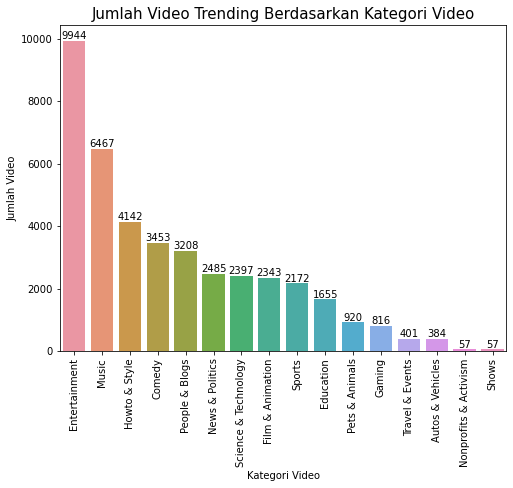

In [31]:
# visualisasi secara aggregat menggunakan barplot
plt.figure(figsize=(8,6))
ax = sns.barplot(x=data["Category"], y=data["Count Video"])
ax.bar_label(ax.containers[0])
plt.title("Jumlah Video Trending Berdasarkan Kategori Video", size=15)
plt.ylabel("Jumlah Video")
plt.xlabel("Kategori Video")
plt.xticks(rotation=90)
plt.show()

In [32]:
# menampilkan Jumlah video berdasarkan trending month 
pd.DataFrame(df_trend["trending_month"].value_counts())

,trending_month
December,6200
March,6183
May,6151
January,5796
February,5571
April,4800
November,3400
June,2800


In [33]:
# data heatmap 
heatmapdata = pd.crosstab(index=df_trend["category"],columns=df_trend["trending_month"])
heatmapdata = heatmapdata[["November", "December", "January","February", "March", "April", "May", "June"]]

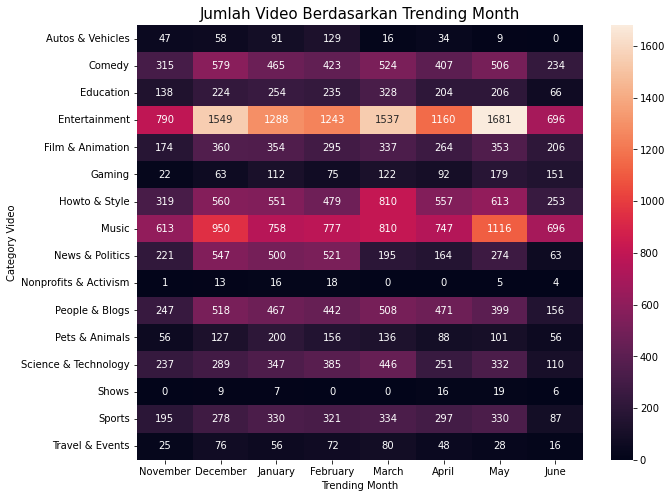

In [34]:
# visualiasi data kategori video yang sering masuk list trending berdasarkan bulan
plt.figure(figsize=(10,8))
sns.heatmap(heatmapdata, annot=True, fmt="g")
plt.title("Jumlah Video Berdasarkan Trending Month", size=15)
plt.xlabel("Trending Month")
plt.ylabel("Category Video")
plt.show()

**Analisis** :Berdasarkan pengelompokan data yang dilakukan berdasarkan kategori, kategori `Entertainment` memiliki video paling banyak masuk trending list, diikuti dengan `Music` dan `Howto & Style`. Kategori yang paling sedikit masuk trending list adalah kategori `Shows` dan `Nonprofits & Activism`. 
Setelah dibuat pengelompokan berdasarkan waktu trending(bulan) dan divisualisasikan menggunakan heatmap, dapat dilihat bahwa `Entertainment`, `Music` dan `Howto & Style` paling banyak punya warna yang cerah yang artinya jumlah video lebih banyak dari yang gelap.
Kategori entertainment termasuk kategori yang memiliki cakupan luas untuk ditonton berbagai kalangan dan umur, video dengan kategori entertainment juga tidak terlalu membuat segmentasi pasar penonton. Berbeda dengan video dengan kategori yang memiliki pasar yang sangat spesifik atau segmented seperti kategori Gaming, yang pasarnya kebanyakan orang yang mengerti dan suka tentang Gaming. 


### 2. Channel youtube apa yang paling sering masuk trending tahun 2017-2018?

Untuk melihat channel apa yang paling sering masuk ke trending adalah dengan mengelompokan berdasarkan channel title dan melihat nilai tengah dari masing-masing view serta berapa video yang berhasil masuk ke trending list. Jumlah video ditampilkan guna melihat konsistensi konten kreator dalam membuat konten video. Sedangkan menggunakan nilai tengah sebagai representasi data views karena data views memiliki distribusi data yang tidak normal.

In [35]:
# 10 channel yang paling sering masuk list trending
df_trend[['channel_title','views']].groupby('channel_title').agg(['median','count']).sort_values(by=('views','count'), ascending=False)[:10].reset_index()

channel_title      views      
                                              median count
0                                    ESPN   477916.0   202
1  The Tonight Show Starring Jimmy Fallon   594536.0   197
2                                 Netflix   438167.0   193
3                                     Vox   597464.0   192
4                            TheEllenShow   951238.5   192
5      The Late Show with Stephen Colbert   525961.0   187
6                       Jimmy Kimmel Live   991525.0   185
7             Late Night with Seth Meyers   779638.0   183
8                          Screen Junkies  1603950.5   182
9                                     NBA   283301.0   181

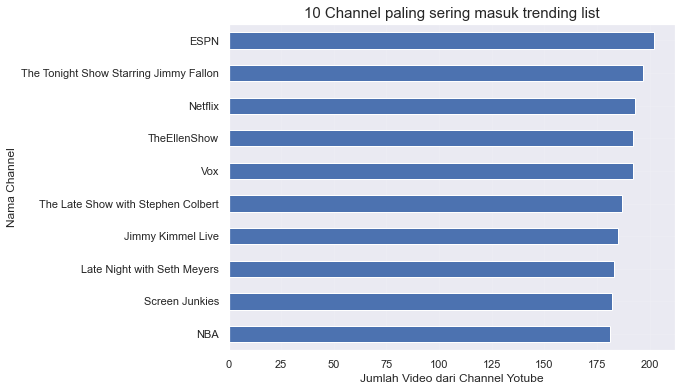

In [36]:
# visualisasi 10 channel paling banyak yang masuk trending
sns.set_theme(style="darkgrid")
dt10 = df_trend['channel_title'].value_counts().head(10).sort_values()
dt10.plot(kind='barh', figsize=(8,6))
plt.title("10 Channel paling sering masuk trending list", size=(15))
plt.xlabel("Jumlah Video dari Channel Yotube")
plt.ylabel("Nama Channel")
plt.grid(alpha=0.1)
plt.show()

In [37]:
# menampilkan jumlah video yang di upload oleh channel yang paling sering masuk ke list trending
print("ESPN mengupload video sebanyak " + str(len(df_trend[df_trend["channel_title"] == "ESPN"].groupby("publish_time").mean())) + " video dalam waktu 205 hari")
print("The Tonight Show Starring Jimmy Fallon mengupload video sebanyak " + str(len(df_trend[df_trend["channel_title"] == "The Tonight Show Starring Jimmy Fallon"].groupby("publish_time").mean())) + " video dalam waktu 205 hari")
print("TheEllenShow mengupload video sebanyak " + str(len(df_trend[df_trend["channel_title"] == "TheEllenShow"].groupby("publish_time").mean())) + " video dalam waktu 205 hari")

ESPN mengupload video sebanyak 84 video dalam waktu 205 hari
The Tonight Show Starring Jimmy Fallon mengupload video sebanyak 72 video dalam waktu 205 hari
TheEllenShow mengupload video sebanyak 74 video dalam waktu 205 hari


**Analisis** : Channel `ESPN` menempati urutan pertama channel yang memiliki jumlah video yang paling banyak masuk trending list yaitu sebanyak 202 kali dari 205 trending date. Channel `ESPN` mengupload video sebanyak 84 video, `The Tonight Show Starring Jimmy Fallon` 72 video, dan `TheEllenShow` 74 video selama 205 hari, hal ini dapat disimpulkan bahwa konsistensi channel ini membuat peluang sebuah video masuk ke dalam trending list. Mereka kurang lebih mengupload satu video setiap 3 hari sekali. Jadi sangat wajar ketika ketiga channel tersebut menjadi channel yang memiliki video yang paling banyak masuk trending, ini juga sesuai dengan apa yang dikatakan oleh youtube tentang video yang mungkin masuk list trending adalah video yang benar-benar baru.

### 3. Channel apa saja yang memiliki views atau penonton paling banyak?

In [38]:
# cek normalitas data views
normaltest(df_trend["views"]) # menggunakan nilai median untuk representasi data karena tidak berdistribusi normal

NormaltestResult(statistic=71043.47485851927, pvalue=0.0)

In [39]:
# Top 10 Channel dengan views tertinggi pada list trending
df_trend.groupby(["channel_title", "category"])[["views"]].median().sort_values("views", ascending=False)[:10].reset_index()

,channel_title,category,views
0,ChildishGambinoVEVO,Music,162556776.0
1,Cardi B,Music,57041045.5
2,BeckyGVEVO,Music,56755211.5
3,LuisFonsiVEVO,Music,51960876.0
4,Kylie Jenner,People & Blogs,49939440.5
5,MalumaVEVO,Music,49195484.0
6,DrakeVEVO,Music,41168952.5
7,FoxStarHindi,Entertainment,39299983.5
8,TheWeekndVEVO,Music,36488080.0
9,Daddy Yankee,Music,32082218.0


In [40]:
# cek normalitas data views
normaltest(df_trend["likes"]) # menggunakan nilai median untuk representasi data karena tidak berdistribusi normal

NormaltestResult(statistic=66853.47889641358, pvalue=0.0)

In [41]:
# Top 10 Channel dengan likes tertinggi pada list trending
df_trend.groupby(["channel_title", "category"])[["likes"]].median().sort_values("likes", ascending=False)[:10].reset_index()

,channel_title,category,likes
0,ChildishGambinoVEVO,Music,4202645.0
1,ibighit,Music,2086731.5
2,David Dobrik,People & Blogs,1967904.0
3,Logan Paul Vlogs,Nonprofits & Activism,1893795.5
4,LuisFonsiVEVO,Music,1834122.5
5,Cardi B,Music,1516224.0
6,BANGTANTV,Music,1059896.5
7,Logan Paul Vlogs,Entertainment,1047916.5
8,Desimpedidos,Sports,1042192.0
9,BeckyGVEVO,Music,1009336.5


**Analisis** : 
Di 10 peringkat video berdasarkan channel_title, category music memiliki jumlah views dan likes yang paling tinggi. Hal ini wajar karena video dengan category music cenderung akan diputar berulang kali, berbeda dengan video di luar category music yang kemungkinan besar tidak akan di putar berulang kali oleh orang yang sama. Karena pada video diluar category music, ketika penonton sudah mengetahui informasi atau berita yang disampaikan, penonton kemungkinan kecil untuk kembali menonton video tersebut.

### 4. Bagaimana karakteristik video yang trending berdasarkan durasi videonya?
Kita akan melihat bagimana nilai median durasi video yang trending pada dataset berdasarkan kategori. Nilai ini dilihat sebagai acuan pembuatan video bagi perusahaan agar video yang dibuat memiliki durasi yang ideal.

In [42]:
# cek normalitas data durasi video
# pada data durasi terdapat missing value, karena pada saat scraping data tidak semua data durasi didapatkan. 
# asumsinya video tersebut sudah di takedown atau dihapus dari kanal youtube
from scipy.stats import normaltest
normaltest(df_trend["duration"].fillna(0))

NormaltestResult(statistic=160552.53711730364, pvalue=0.0)

In [43]:
# nilai median durasi video berdasarkan kategori 
df_trend.groupby(["category"]).median()[["duration"]]/60

,duration
category,
Autos & Vehicles,5.883333
Comedy,4.666667
Education,5.916667
Entertainment,5.816667
Film & Animation,2.633333
Gaming,3.933333
Howto & Style,10.983333
Music,3.733333
News & Politics,3.133333


**Analisis** : Dapat dilihat bawah nilai median untuk beberapa kategori berbeda-beda, hal ini dapat menjadi acuan ketika ingin memembuat video agar konten yang dibuat tidak terlalu over duration atau less duration, contohnya seperti kategori `Howto & Style` yang memiliki nilai median durasi yang paling tinggi. Kategori ini sangat wajar memiliki durasi yang tinggi karena channel-channel pada categori ini banyak mengandung konten helpfull atau tutorial yang direkam dalam sebuah video. 

### 5. Faktor-faktor apa saja yang membantu sebuah video masuk pada trending list. 

### a. Tags atau Keyword
Salah satu faktor yang perlu diperhatikan ketika sebuah video ingin trending adalah bagaimana kita dapat memanfaatkan fitur tags pada video, fitur ini adalah fitur yang tersembunyi dibalik video dan tidak nampak oleh penonton. Tags ini diatur oleh konten kreator untuk memberi keyword agar sesuai dengan apa yang dicari oleh penonton. Pemanfaatan tags atau keyword masuk dalam salah satu `Optimalisasi Metadata`. <br>
* Kita akan menganalisis tags atau keyword dengan menghitung jumlah tags pada setiap video, penghitungan jumlah tags ini didasarkan atas artikel yang mengatakan bahwa pemberian tags jumlah tertentu dapat meningkatkan performa video.

In [44]:
# mengitung jumlah tags pada setiap video
df_trend['tagCount'] = df_trend['tags'].apply(lambda x: 0 if x is None else len(x))

In [45]:
# cek normalitas data
normaltest(df_trend["tagCount"])
# data di representasikan oleh nilai median

NormaltestResult(statistic=1351.9670836818468, pvalue=2.655081893761337e-294)

In [46]:
# describe data jumlah tags atau keyword
df_trend[["tagCount"]].describe()

,tagCount
count,40901.000000
mean,19.694580
std,12.073036
min,0.000000
25%,10.000000
50%,19.000000
75%,29.000000
max,69.000000


<Figure size 576x432 with 0 Axes>

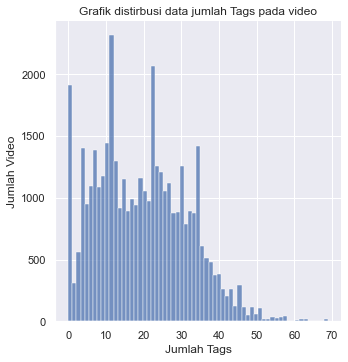

In [47]:
plt.figure(figsize=(8,6))
sns.displot(df_trend['tagCount'])
plt.title("Grafik distirbusi data jumlah Tags pada video")
plt.xlabel("Jumlah Tags")
plt.ylabel("Jumlah Video")
plt.show()

In [48]:
# buat klasifikasi video yang memiliki tags dan tidak
tags_yes_no = []
for i in range(len(df_trend)):
    if df_trend["tagCount"].iloc[i] > 0:
        tags_yes_no.append("Yes")
    else:
        tags_yes_no.append("No")
df_trend["Tags_Class"] = tags_yes_no

In [49]:
# melihat perbandingan views pada video yang memiliki tags dengan tidak
# data tidak berdistribusi normal jadi menggunakan nilai median
df_trend.groupby("Tags_Class").median()[["views"]].sort_values("views", ascending=False).reset_index()

,Tags_Class,views
0,Yes,686481.0
1,No,494297.0


**Analisis**: Dapat dilihat nilai median jumlah tags atau keyword pada dataset sebesar 19 buah, maksimal tags dengan 69, dan minimal dengan 0 atau video yang tidak memberikan tags ketika mengupload video. Nilai tengah atau median views dari video yang memiliki tags dan tidak juga terdapat perbedaan, dengan tags dan keyword memiliki nilai median views sebesar 690395, sedangkan untuk yang tidak memiliki tags nilai median views sebesar 545674. Tags juga memiliki relevansi dengan algoritma pencarian youtube, video dengan tags akan lebih mudah masuk rekomendasi ketika keyword atau tags pada video dicari oleh user atau penonton. Pengisian tags juga perlu diperhatikan dengan keterkaitannya dengan tema video, judul video dan deskripsi video. 

### b. Bagaimana Interaction (Active User) yang ada pada video yang masuk list trending?
Faktor lain yang mampu memengaruhi performa video adalah interaksi yang ada dalam video, pengukuran interaksi ini didasarkan pada jumlah komentar dalam video dibandingkan dengan total views pada video tersebut. Pengkuran rasio ini berdasarkan artikel yang ditulis oleh Mark Robertson (https://tubularlabs.com/blog/3-metrics-youtube-success/). Interaksi rasio yang baik menurut Mark adalah 0.5%, artinya ketika video memiliki views sebanyak 2000 maka minimal komentar sebanyak 10 komentar untuk mengatakan video tersebut bagus. 

In [50]:
# buat dataframe baru df_engage untuk menghitung interaction ratio
df_engage = df_trend

In [51]:
# membuat kolom likes_ratio dan interaction
df_engage.drop(df_engage[df_engage['comment_count'] == 0].index, inplace=True)
df_engage["likes"] = df_engage["likes"].apply(lambda x: np.nan if x == 0 else x)
df_engage.drop(df_engage[df_engage['likes'].isna()].index, inplace=True)
df_engage["likes_ratio"] = df_engage["likes"]/df_engage["views"]*100
df_engage["interaction"] = df_engage["comment_count"]/df_engage["views"]*100

In [52]:
# cek normalitas data 
normaltest(df_engage["interaction"]) # data interaction ratio pada setip video tidak normal 

NormaltestResult(statistic=48313.400743193786, pvalue=0.0)

In [54]:
# describe data intertion ratio
df_engage[["interaction"]].describe()

,interaction
count,40079.000000
mean,0.453745
std,0.575460
min,0.000070
25%,0.167311
50%,0.302688
75%,0.527748
max,11.764299


In [55]:
# buat class interaction ratio
class_interaction = []
for i in range(len(df_engage)):
    if df_engage["interaction"].iloc[i] >= 0.5:
        class_interaction.append("Good")
    else:
        class_interaction.append("Not Good")
df_engage["class_interaction"] = class_interaction

In [56]:
# menampilkan data class interaction dalam bertuk dataframe dan jumlah video
x = df_engage["class_interaction"].value_counts().to_dict()
x = pd.DataFrame(list(x.items()), columns=["Class","Count Video"])
x

,Class,Count Video
0,Not Good,29169
1,Good,10910


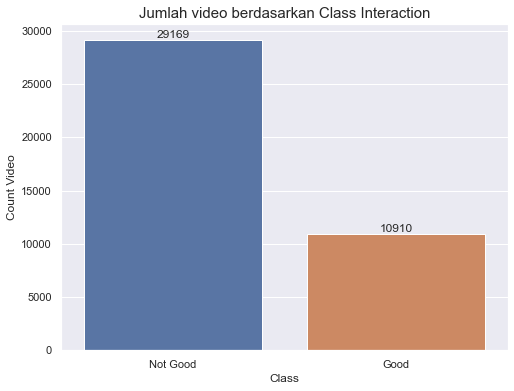

In [57]:
# visualisasi data jumlah video berdasarakn class interaction
plt.figure(figsize=(8,6))
ax = sns.barplot(x=x["Class"], y=x["Count Video"])
ax.bar_label(ax.containers[0])
plt.title("Jumlah video berdasarkan Class Interaction", size=15)
plt.show()

In [58]:
# perbandingan view berdasarkan class_interaction
df_engage.groupby("class_interaction")[["views"]].median()

,views
class_interaction,
Good,493254.5
Not Good,770520.0


In [59]:
# menampilkan video dengan interaksi paling tinggi dan rendah sebagai perbandingan
display(df_engage[df_engage["interaction"] == (df_engage["interaction"].max())][["views","interaction", "class_interaction","trending_time"]] , df_engage[df_engage["interaction"] == (df_engage["interaction"].min())][["views","interaction", "class_interaction","trending_time"]])

,views,interaction,class_interaction,trending_time
38384,708610,11.764299,Good,2 days


,views,interaction,class_interaction,trending_time
5495,2843524,0.00007,Not Good,10 days


**Analisis:**
Pada hasil analisis kolom comment count dan views (hanya mengambil data mengaktifkan comment count) didapatkan nilai atau rasio interaksi pada setiap video. Di dapatkan nilai terendah 0.000070% dan nilai tertinggi 11.764299%, sedangkan berdasarkan artikel yang ditulis oleh Mark, interaksi video yang baik adalah 0.5%. Lalu setelah diklasifikasikan menjadi Good dan Not Good, didapatkan lebih dari 25% data memiliki interaksi video yang baik. Artinya interaksi juga menjadi faktor penting dalam sebuah video atau konten youtube. Dapat dilihat juga bahwa views video dengan class Not Good lebih banyak dari yang memiliki class Good, hal ini menjadikan views bukan faktor utama masuknya video kedalam trending list, faktor interaksi dengan user juga jadi salah satu penyebab sebuah video dapat masuk list trending.

### c. Bagimana video yang banyak disukai oleh penonton?
Untuk melihat video yang disukai oleh penonton, kita perlu melihat bagaimana like ratio yang ada dalam setiap video, like ratio adalah perbandingan nilai antara jumlah like dengan jumlah views, menurut beberapa artikel like ratio yang bagus untuk sebuah video adalah 4%, artinya dari setiap 100 views ada 4 likes dalam video tersebut. Dalam hal ini likes juga punya pengaruh terhadap algoritma youtube, semakin banyak likes yang didapatkan oleh video, semakin besar juga kemungkinan untuk tampil di pencarian youtube yang relevan.
sumber(https://dailyiowan.com/2021/11/09/is-it-important-to-get-more-likes-on-youtube/, https://tubularlabs.com/blog/3-metrics-youtube-success/)

In [60]:
# menampilkan likes_ratio dan views berdasarkan kategori 
df_engage.groupby("category").median()[["likes_ratio", "views"]].sort_values("likes_ratio", ascending=False).reset_index()

,category,likes_ratio,views
0,Howto & Style,4.310521,501670.0
1,Music,3.952230,1435691.5
2,Comedy,3.843613,983365.0
3,People & Blogs,3.671286,607307.0
4,Education,3.629185,420549.0
5,Gaming,3.410600,1502708.0
6,Nonprofits & Activism,3.330356,144532.0
7,Pets & Animals,3.089182,445297.5
8,Science & Technology,2.736236,561339.0
9,Film & Animation,2.343684,1289064.0


**Analisis** : Dapat dilihat dari data bahwa categori dengan nilai median likes ratio yang paling tinggi adalah `Howto & Style` dengan like ratio 4.3% namun ketika dilihat dari median viewsnya, nilainya tidak sebanyak category `Gaming`, `Shows`, dan `Music` yang nilai median viewsnya lebih dari 1 juga views. Kemudian `Nonprofits & Activism` dengan nilai median views yang rendah mampu menembus list trending dan menghasilkan like ratio sebesar 3.3%. Hal ini semakin menambah informasi bahwa views bukan menjadi faktor kunci sebuah video dapat masuk ke trending list.

### Berdasarkan analisis pada views dan likes kita akan melakukan pengecekan atau uji korelasi pada variabel numerik, untuk melihat bagaimana korelasi dari masing-masing variabel. 

In [61]:
# uji normalitas data 
normaltest(df_engage[["views","likes", "dislikes", "comment_count", "duration"]].fillna(0))

NormaltestResult(statistic=array([ 69699.63278695,  65197.89901248, 115766.58119418,  86699.55454482,
        84504.30617869]), pvalue=array([0., 0., 0., 0., 0.]))

In [62]:
# menguji korelasi data view, likes, dislikes, comment_count, duration dengan method spearman
# karena data yang akan di uji masing-masing memiliki distribusi data yang tidak normal
df_corr = df_engage[["views","likes", "dislikes", "comment_count", "duration", "likes_ratio", "interaction", "tagCount"]].corr(method="spearman")
df_corr

,views,likes,dislikes,comment_count,duration,likes_ratio,interaction,tagCount
views,1.000000,0.866859,0.858432,0.832305,0.050371,0.038434,-0.146929,0.078489
likes,0.866859,1.000000,0.795936,0.892235,0.154736,0.474442,0.131270,0.046639
dislikes,0.858432,0.795936,1.000000,0.860656,0.108109,0.091713,0.092801,0.063867
comment_count,0.832305,0.892235,0.860656,1.000000,0.204972,0.334148,0.360988,0.058520
duration,0.050371,0.154736,0.108109,0.204972,1.000000,0.261147,0.306906,0.172093
likes_ratio,0.038434,0.474442,0.091713,0.334148,0.261147,1.000000,0.575679,-0.030133
interaction,-0.146929,0.131270,0.092801,0.360988,0.306906,0.575679,1.000000,-0.021348
tagCount,0.078489,0.046639,0.063867,0.058520,0.172093,-0.030133,-0.021348,1.000000


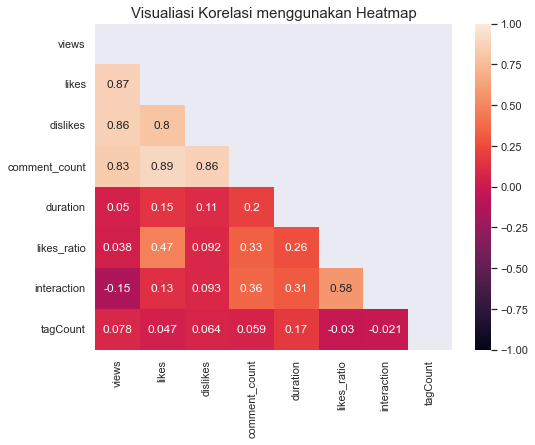

In [63]:
# visualiasai korelasi dengan menggunakan heatmap
mask = np.triu(np.ones_like(df_corr))
plt.figure(figsize=(8,6))
plt.title("Visualiasi Korelasi menggunakan Heatmap", size=15)
sns.heatmap(df_corr, mask=mask, vmax=1,vmin=-1, annot=True)
plt.show()

**Analisis**: Dapat dilihat bahwa views dan likes memiliki memiliki nilai korelasi yang tinggi yaitu 0.87, hal ini mendukung analisis pada jumlah likes juga memengaruhi masuknya sebuah video masuk ke trending list Youtube. Algoritma youtube juga mendukung bahwa ketika video memiliki banyak likes, maka youtube akan menempatkan video pada urutan pertama pada pencarian yang relevan.

### 6. Kapan waktu upload video yang paling cocok berdasarkan data trending?

In [64]:
# melihat waktu upload video yang trending berdasarkan hari
wt = df_trend.groupby("publish_time_day")[["channel_title"]].count().reset_index()
wt = wt.sort_values("channel_title",ascending=False)
wt 

,publish_time_day,channel_title
0,Friday,6892
4,Thursday,6817
5,Tuesday,6685
6,Wednesday,6611
1,Monday,6012
3,Sunday,3556
2,Saturday,3506


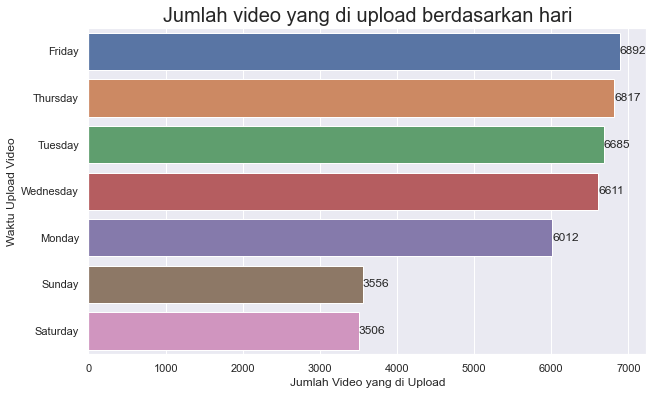

In [65]:
# visualisasi data Jumlah video yang di upload berdasarkan hari
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10,6))
ax = sns.barplot(x=wt["channel_title"], y=wt["publish_time_day"])
ax.bar_label(ax.containers[0])
plt.title("Jumlah video yang di upload berdasarkan hari", size=20)
plt.xlabel("Jumlah Video yang di Upload")
plt.ylabel("Waktu Upload Video")
plt.show()

**Analisis**: Berdasarkan data visualisasi data yang dikelompokan berdasarkan hari dimana video yang trending diupload, kita dapat melihat bahwa video yang masuk list trending youtube cenderung di upload pada hari Jumat, Kamis, Selasa dan Rabu. 
Hal ini dapat menjadi acuan ketika konten kreator di US ingin mengungah video. 

### Pukul berapa video yang trending banyak di upload?

In [66]:
# melihat video yang trending berdasarkan jam upload
wh = df_trend.groupby("publish_time_hour")[["channel_title"]].count().reset_index()
wh = wh.sort_values("publish_time_hour")

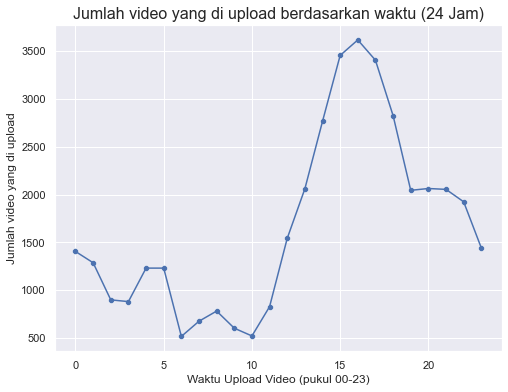

In [67]:
# visualisasi Jumlah video yang di upload berdasarkan waktu (24 Jam)
sns.set_theme(style="darkgrid")
plt.figure(figsize=(8,6))
ax = sns.lineplot(y=wh["channel_title"], x=wh["publish_time_hour"])
sns.scatterplot(y=wh["channel_title"], x=wh["publish_time_hour"])
plt.title("Jumlah video yang di upload berdasarkan waktu (24 Jam)", size=16)
plt.xlabel("Waktu Upload Video (pukul 00-23)")
plt.ylabel("Jumlah video yang di upload")
plt.show()

**Analisis** : Berdasarkan data di atas waktu yang paling banyak video diupload ke yotube adalah pukul 15.00, 16.00, 17.00 waktu US. 

###   7. Berapa lama waktu yang dibutuhkan video untuk trending setelah pertama kali upload?

In [68]:
# menampilkan data kecepatan trending dan kategori
trend_speed = df_trend.groupby("video_id")[["category","trending_time"]].min().reset_index()
trend_speed.head()

,video_id,category,trending_time
0,-0CMnp02rNY,Entertainment,2 days
1,-0NYY8cqdiQ,Entertainment,3 days
2,-1Hm41N0dUs,Comedy,2 days
3,-1yT-K3c6YI,People & Blogs,1 days
4,-2RVw2_QyxQ,Education,2 days


In [69]:
# describe data kecepatan trending
trend_speed.describe ()

,trending_time
count,6208
mean,21 days 16:16:18.865979381
std,208 days 04:41:11.649887146
min,0 days 00:00:00
25%,1 days 00:00:00
50%,2 days 00:00:00
75%,3 days 00:00:00
max,4215 days 00:00:00


Data diatas merupakan data trending_time atau lama waktu dari video di upload sampai video pertama kali trending. Dapat dilihat bawah lama waktunya tidak berdistribusi normal. Dari 6351 video, median waktu trendingnya adalah 2 hari dari pertama video di upload. 75% video yang masuk list trending merupakan video-video baru, hal ini dapat dilihat dari data diatas yang memperlihatkan sebanyak 25% video masuk list trending dalam waktu 1 hari, 50% video masuk list trending dalam waktu 2 hari dan 75% dalam waktu 3 hari. 

**Analisis**: Pada tabel diatas dapat dikatakan bahwa 75% data memiliki waktu trending 1-3 hari, artinya video yang masuk pada list trending mayoritas video baru . Hal ini sejalan dengan apa yang dikatakan oleh youtube bahwa tujuan dibuat tab trending untuk menampilkan video yang mengejutkan atau benar-benar baru.
Video dengan waktu trending yang paling lama pada dataset ini adalah 4215 hari, hal ini juga sejalan dengan apa yang dikatakan oleh youtube bahwa video yang trending tidak terbatas oleh umur video, video yang sudah diupload dalam waktu yang lama juga punya kemungkinan masuk list trending. 

# WordCloud
Menampilkan kata-kata yang sering muncul pada tags, descr

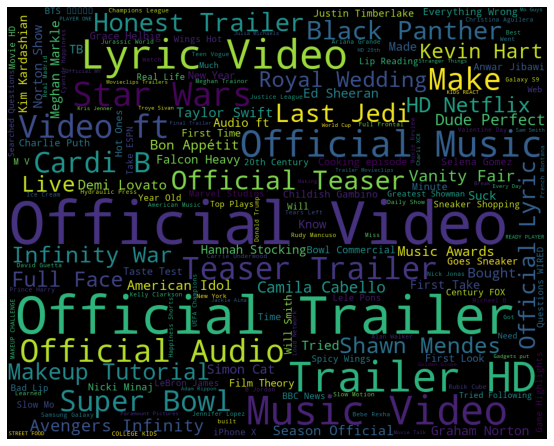

In [70]:
# kata atau karakter yang paling banyak muncul berdasarkan tags pada video
tags_data = ''
stopwords = set(STOPWORDS)

for i in df_trend["title"]:
    i = str(i)
    tokens = i.split()
    tags_data += " ".join(tokens)+" "
    for j in range(len(tokens)):
        tokens[j] = tokens[j].lower()

wordcloud = WordCloud(width=1000, height=800,stopwords=stopwords,min_font_size=10).generate(tags_data)

plt.figure(figsize=(12, 6), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


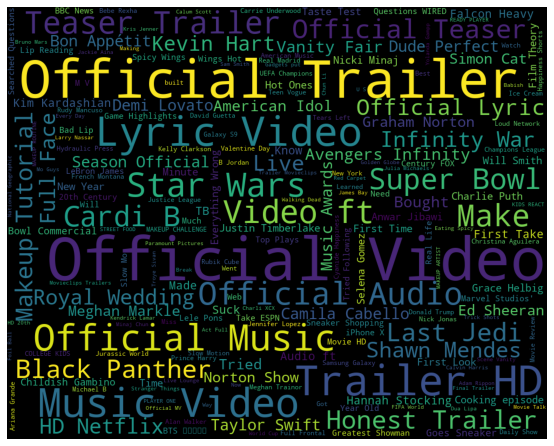

In [71]:
# kata atau karakter yang paling banyak muncul berdasarkan judul video
data_title = ''
stopwords = set(STOPWORDS)

for i in df_trend["title"]:
    i = str(i)
    tokens = i.split()
    data_title += " ".join(tokens)+" "
    for j in range(len(tokens)):
        tokens[j] = tokens[j].lower()

wordcloud = WordCloud(width=1000, height=800,stopwords=stopwords,min_font_size=10).generate(data_title)

plt.figure(figsize=(12, 6), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

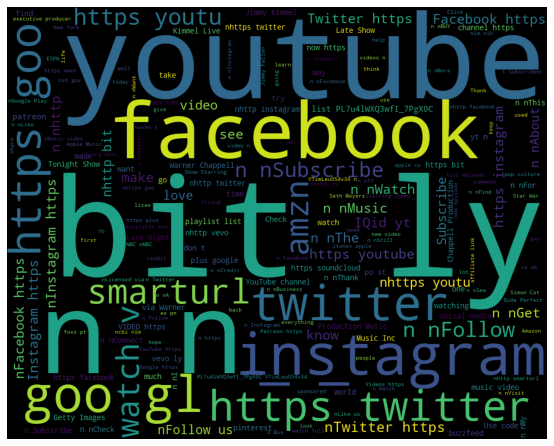

In [84]:
# kata atau karakter yang paling banyak muncul berdasarkan deskripsi video
data_deskripsi = ''
stopwords = set(STOPWORDS)

for i in df_trend["description"]:
    i = str(i)
    tokens = i.split()
    data_deskripsi += " ".join(tokens)+" "
    for j in range(len(tokens)):
        tokens[j] = tokens[j].lower()

wordcloud = WordCloud(width=1000, height=800,stopwords=stopwords,min_font_size=10).generate(data_deskripsi)

plt.figure(figsize=(12, 6), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# Kesimpulan

Dari analisis yang telah dilakukan kita dapat membuat kesimpulan tentang bagimana karakteristik video yang masuk pada trending list di US
* Dari berbagi macam kategori, kategori yang paling banyak diminati adalah `Entertainment`, `Music`, dan `Howto and Style`, hal ini dapat dilihat dari jumlah video yang masuk pada list trending. Ketiga kategori diatas memiliki jumlah video paling banyak (Top 3).
* Konsistensi konten kreator dalam mengunggah video menjadi salah satu faktor masuknya sebuah channel ke dalam trending list, hal ini dapat dilihat dari channel `ESPN` yang mengunggah 83 video dari 205 hari trending. 
* Video dengan kategori music menjadi video dengan views dan likes tertingi, hal tersebut wajar karena music cenderung diputar berulang kali daripada video kategori lain.
* Durasi menjadi faktor yang krusial dalam pembuatan video. 
* Tags menjadi salah satu faktor pada video yang dapat menambah peluang video masuk pada trending list, ada tidaknya tags menjadi pembeda pada dataset ini. Video dengan tags memiliki nilai median views lebih tinggi daripada yang tidak.
* Interaction (Active User) juga menjadi salah satu hal yang perlu diperhatikan ketika menjadi konten kreator, tingginya interaction memengaruhi sebuah video untuk masuk ke dalam trending list. 
* Rasio likes punya pengaruh terhadap peluang sebuah video masuk ke trending list, rasio likes juga membuktikan bahwa views tinggi tidak menjamin sebuah video masuk list trending.
* Views dan likes punya nilai korelasi yang tinggi. 
* Hari Jumat, Kamis, Selasa dan Rabu menjadi hari terbanyak dimana konten kreator menguplod video mereka, dan pada pukul 15.00 - 17.00 menjadi waktu yang didominasi oleh video yang masuk pada trending list.
* Waktu yang dibutuhkan video baru untuk masuk trending sekitar 0 sampai 3 hari, meskipun masuk trending video tidak terbatas pada umur video.

Berikut merupakan karakteristik video yang masuk pada trending list:
* Video memiliki cakupan yang luas seperti pada kategori `Entertainment`, `Music`, dan `Howto and Style`.
* Umumnya video di unggah secara konsisten.
* Penentuan durasi harus sesuai dengan tema atau kategori video.
* Memunculkan Tags atau Keyword yang relevan. 
* Punya interaction ratio di atas 0.5%. 
* Punya likes ratio diatas 4%. 
* Memperhatikan waktu upload video.


# Rekomendasi 

1. Tentukan audience atau target market kita dalam membuat konten. Riset ini dapat dilakukan untuk mengetahui apa yang disukai oleh audience yang kita suka, dengan riset kita tidak perlu coba-coba dalam membuat konten.
2. Pembuatan video bisa diawali dengan riset terkait tema video yang akan dibuat. Penentuan tema atau kategori video berhubungan dengan durasi video yang akan dibuat. 
3. Membuat atau mengunggah video secara konsisten, konsistensi ini yang membuat seorang konten kreator atau sebuah channel dapat dikenal atau memiliki market tersendiri. 
4. Buat video atau konten yang memungkinkan user/penonton berinteraksi di kolom komentar, tidak harus ajakan eksplisit untuk berkomentar di kolom komentar, bisa juga dengan video yang punya daya tarik tersendiri agar setiap orng yang menonton mau berkomentar di kolom komentar. Usahakan yang mengandung konten positif. 
5. Penggunaan SEO untuk optimaliasi traffic di video, SEO ini digunakan untuk membantu memunculkan video paling atas ketika ada user melakukan pencarian. Hal ini dapat meningkatkan peluang video kita dapat ditonton oleh user. Berikut merupakan list yang dapat dilakukan dalam SEO:
    * Riset Keyword : Usahakan memerhatikan keyword yang sesuai dengan tema video kita dan punya volume pencarian yang tinggi. 
    * Gunakan judul/title yang sesuai dengan tema video, usahakan gunakan thumbnail yang menarik. 
    * Pasang keyword yang sudah ditentukan dalam deskripsi video.
    * Gunakan tags yang sesuai dengan judul, tema dan deksripsi video yang akan dibuat. Berdasarkan data jumlah tags yang direkomendasikan tags yang dapat di buat kurang lebih 19 tags.
    * Promosikan video secepat mungkin, lakukan promosi di platform social media lain. Dapat dilakukan dengan membuat short video atau share link pada social media lain. Karena berdasarkan data, mayoritas video yang trending adalah video-video yang cenderung sangat baru. Kepecatan penambahan views inilah yang juga dapat membuat video kita masuk dalam trending list.
6. Tentukan Hari dan Jam upload video yang efektif, berdasarkan data jam yang baik untuk mengunggah video adalah hari Jumat dan estimasi jam 15.00 - 17.00.